In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/Customer_Segmentation.csv')

In [3]:
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [4]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
data.shape

(8068, 11)

In [6]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [8]:
data.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [9]:
for i in ['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1','Segmentation']:
  print(i,':', data[i].unique())

Gender : ['Male' 'Female']
Ever_Married : ['No' 'Yes' nan]
Age : [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Graduated : ['No' 'Yes' nan]
Profession : ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Work_Experience : [ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
Spending_Score : ['Low' 'Average' 'High']
Family_Size : [ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]
Var_1 : ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
Segmentation : ['D' 'A' 'B' 'C']


In [10]:
for i in ['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1','Segmentation']:
  print(i,'=',data[i].value_counts())

Gender = Male      4417
Female    3651
Name: Gender, dtype: int64
Ever_Married = Yes    4643
No     3285
Name: Ever_Married, dtype: int64
Age = 35    250
37    234
33    232
42    232
40    229
     ... 
78     29
87     28
76     27
80     24
85     22
Name: Age, Length: 67, dtype: int64
Graduated = Yes    4968
No     3022
Name: Graduated, dtype: int64
Profession = Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64
Work_Experience = 1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64
Spending_Score = Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64
Family_Size = 2.0    2390
3.0    1497
1.0    1453
4.0

# **EDA**

# Histogram

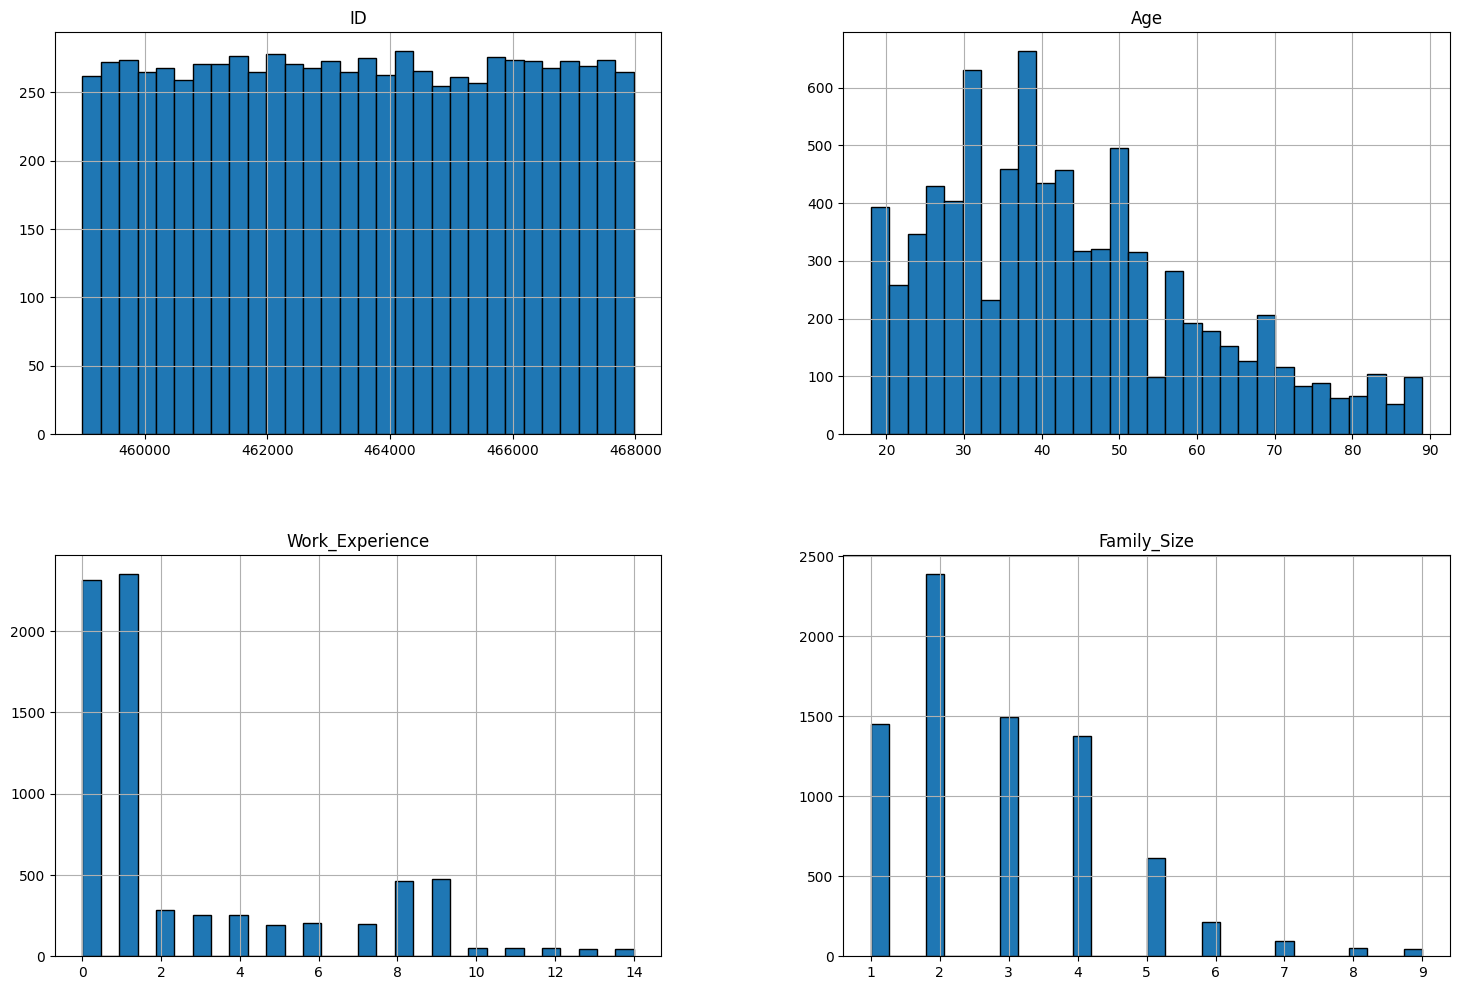

In [11]:
#Histogram
data.hist(bins=30,figsize=(18,12),edgecolor='black')
plt.show()

# Countplot

<Axes: xlabel='Gender', ylabel='count'>

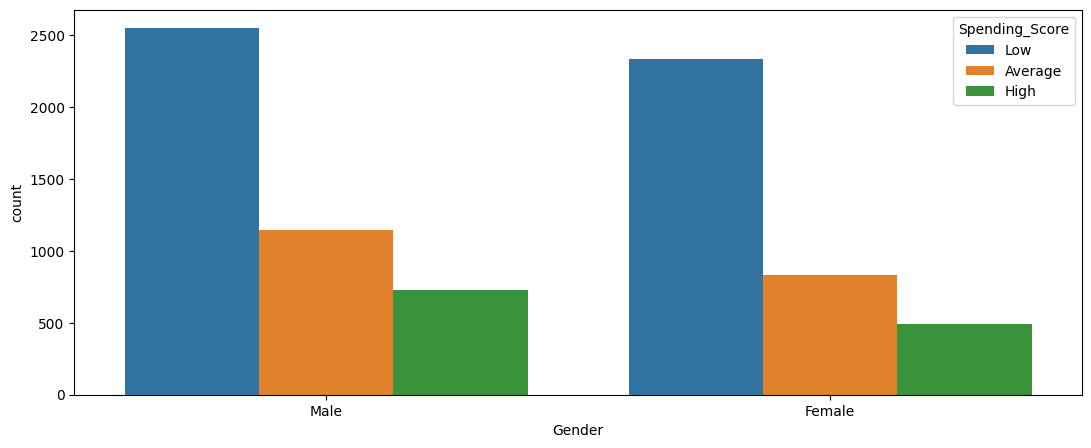

In [12]:

plt.figure(figsize=(13,5))
sns.countplot(x=data['Gender'],hue=data['Spending_Score'])

<Axes: xlabel='Ever_Married', ylabel='count'>

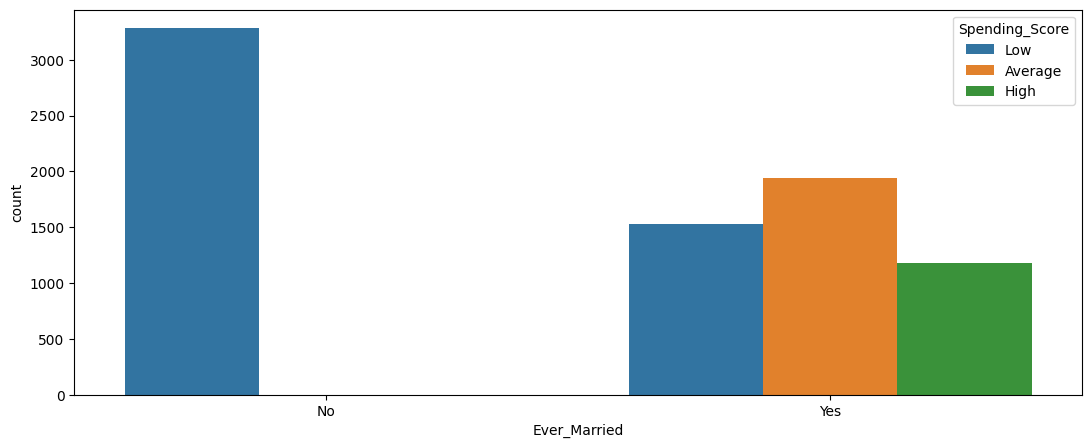

In [13]:
plt.figure(figsize=(13,5))
sns.countplot(x=data["Ever_Married"],hue=data["Spending_Score"])

<Axes: xlabel='Graduated', ylabel='count'>

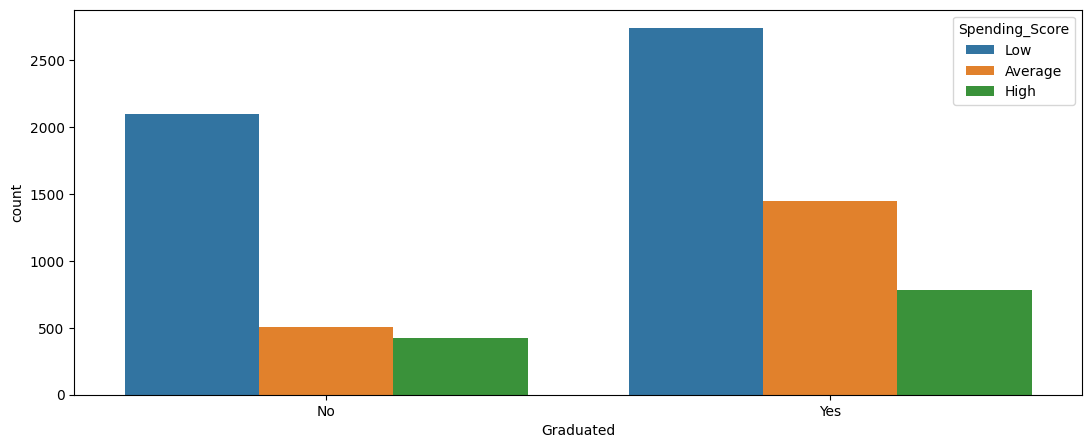

In [14]:
plt.figure(figsize=(13,5))
sns.countplot(x=data['Graduated'],hue=data['Spending_Score'])

<Axes: xlabel='Profession', ylabel='count'>

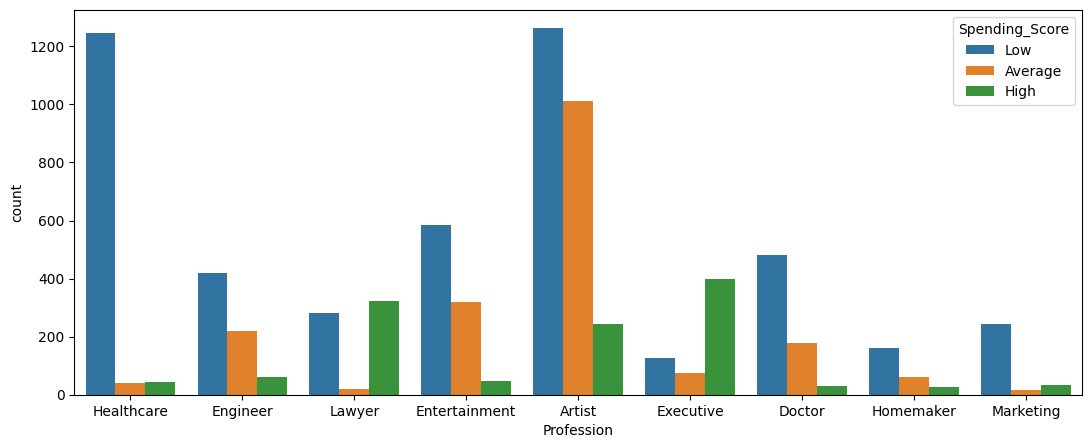

In [15]:
plt.figure(figsize=(13,5))
sns.countplot(x=data['Profession'],hue=data['Spending_Score'])

<Axes: xlabel='Family_Size', ylabel='count'>

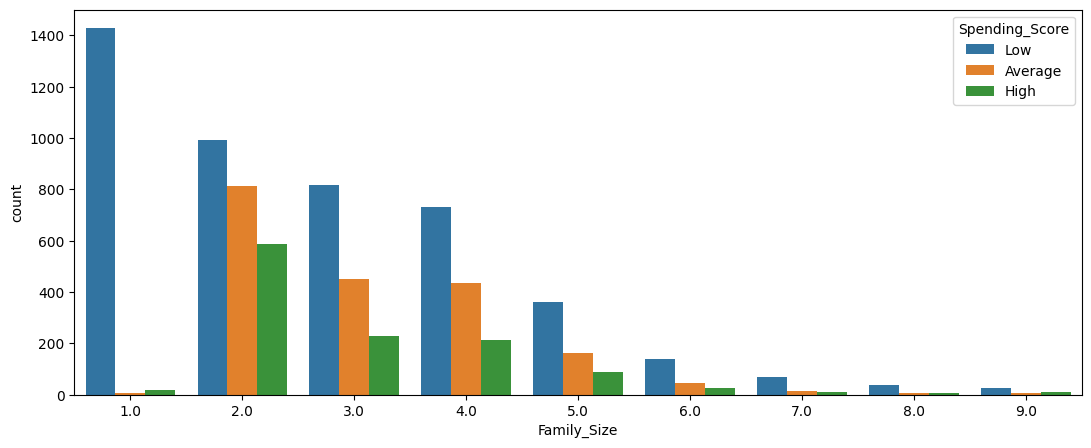

In [16]:
plt.figure(figsize=(13,5))
sns.countplot(x=data['Family_Size'],hue=data['Spending_Score'])

<Axes: xlabel='Var_1', ylabel='count'>

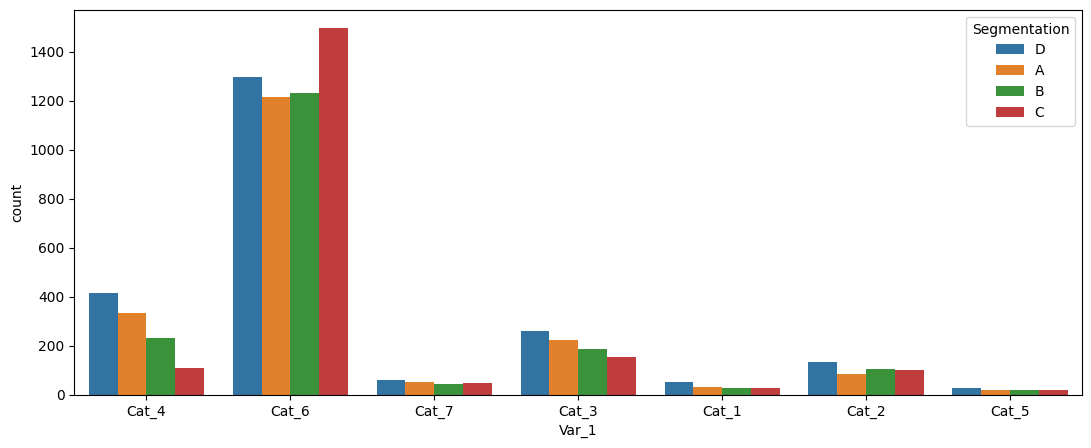

In [17]:
plt.figure(figsize=(13,5))
sns.countplot(x=data['Var_1'],hue=data['Segmentation'])

<Axes: xlabel='Segmentation', ylabel='count'>

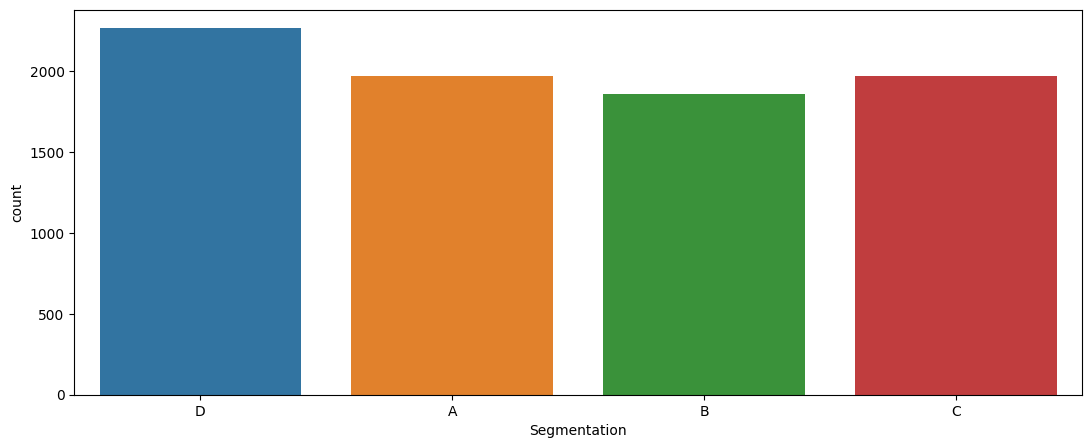

In [18]:
plt.figure(figsize=(13,5))
sns.countplot(x=data['Segmentation'])

# Barplot

<Axes: xlabel='Spending_Score', ylabel='Age'>

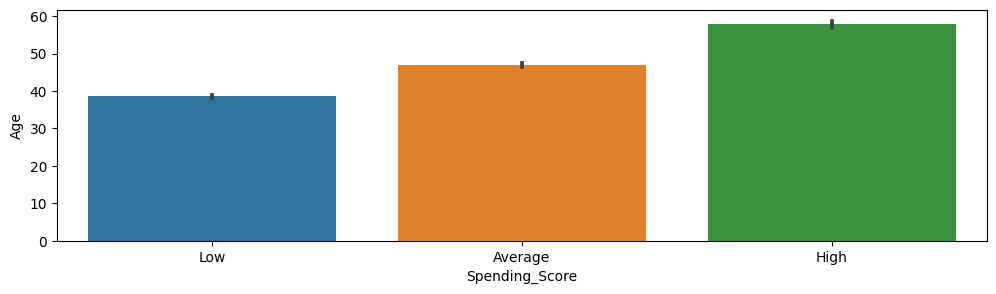

In [19]:

plt.figure(figsize=(12,3))
sns.barplot(x=data ['Spending_Score'],y=data['Age'])

<Axes: xlabel='Spending_Score', ylabel='Family_Size'>

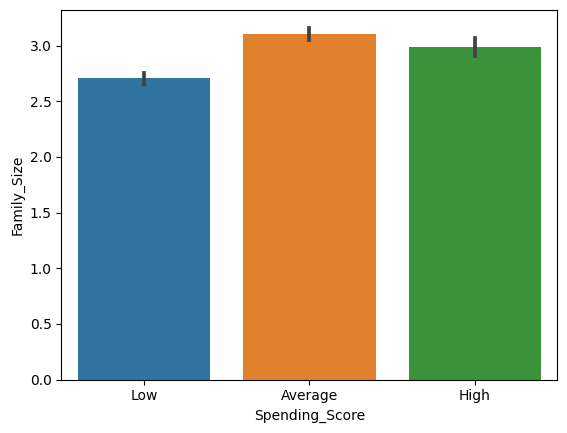

In [20]:
sns.barplot(x=data ['Spending_Score'],y=data['Family_Size'])

<Axes: xlabel='Spending_Score', ylabel='Work_Experience'>

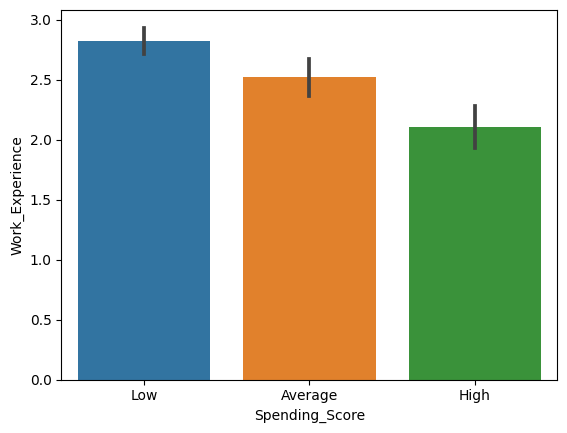

In [21]:
sns.barplot(x=data ['Spending_Score'],y=data['Work_Experience'])

<Axes: xlabel='Segmentation', ylabel='Family_Size'>

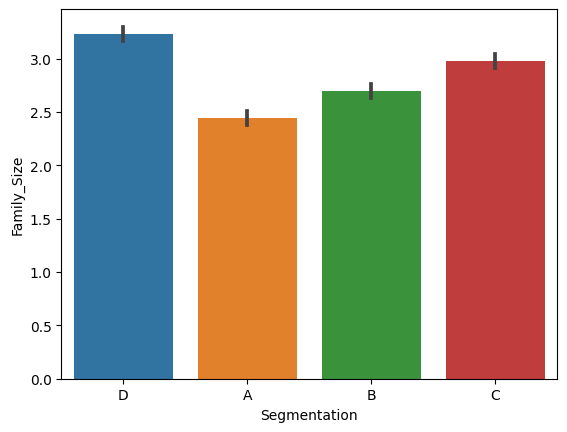

In [22]:
sns.barplot(x=data ['Segmentation'],y=data['Family_Size'])

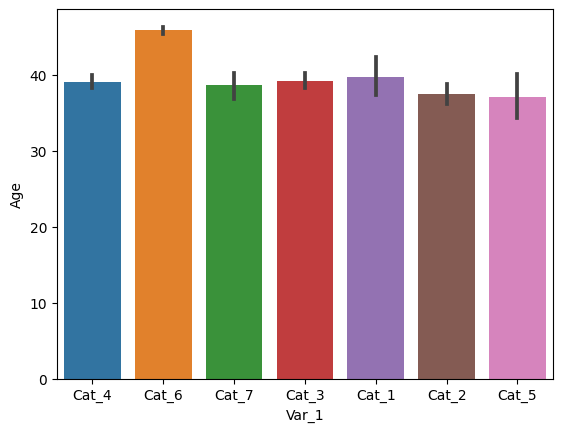

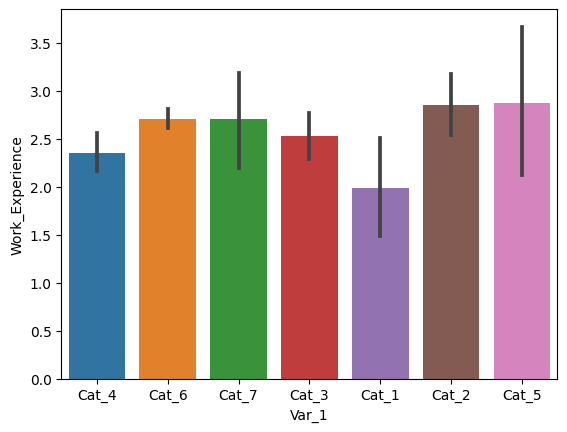

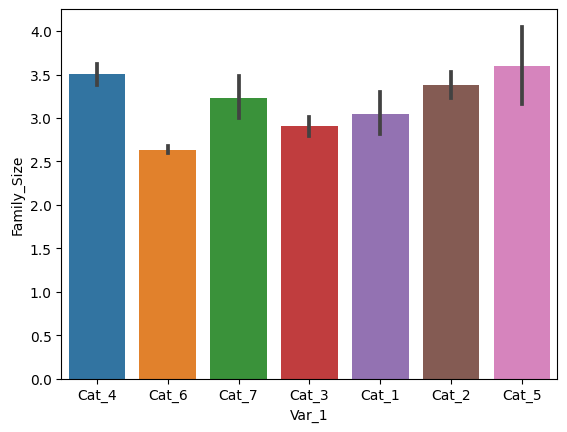

In [23]:
for i in ['Age','Work_Experience','Family_Size']:
  sns.barplot(x=data ['Var_1'],y=data[i])
  plt.show()

# Pairplot

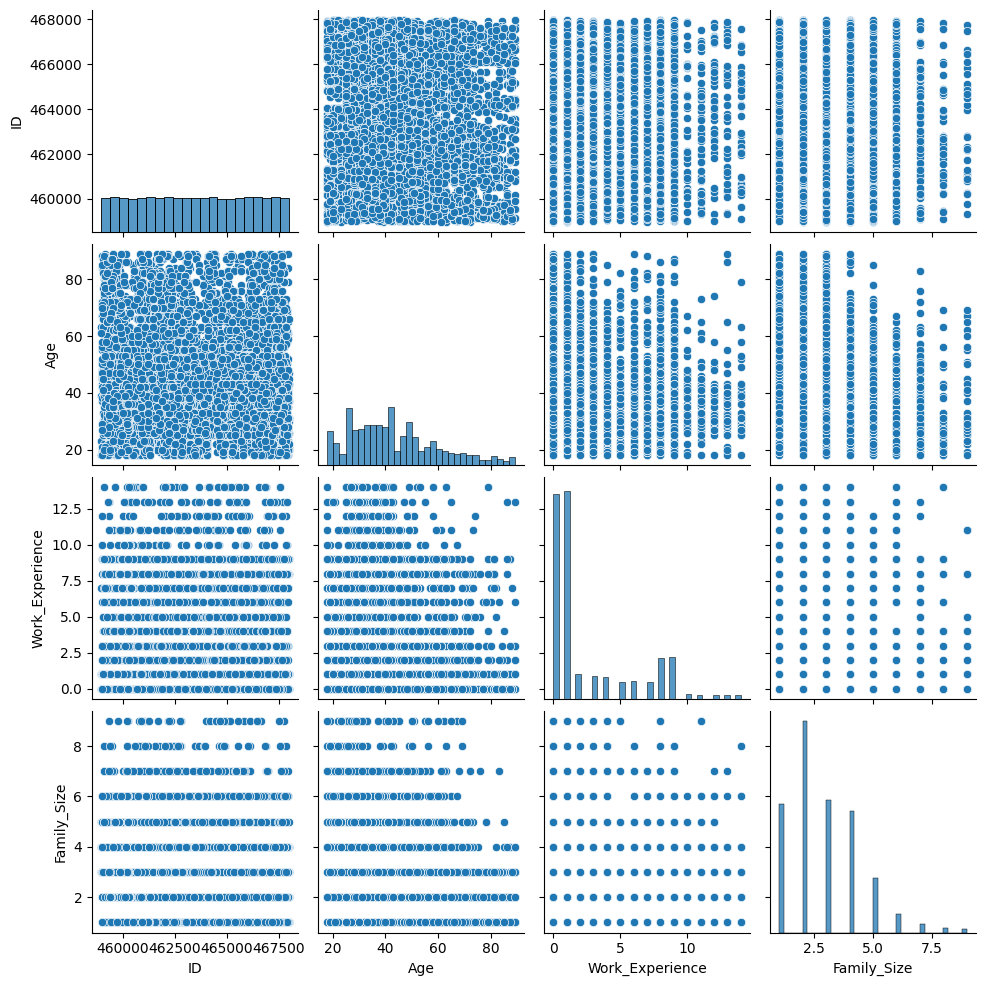

In [24]:
sns.pairplot(data)
plt.show()

# Heatmap

<ipython-input-25-490aeb054bcb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix=data.corr()


<Axes: >

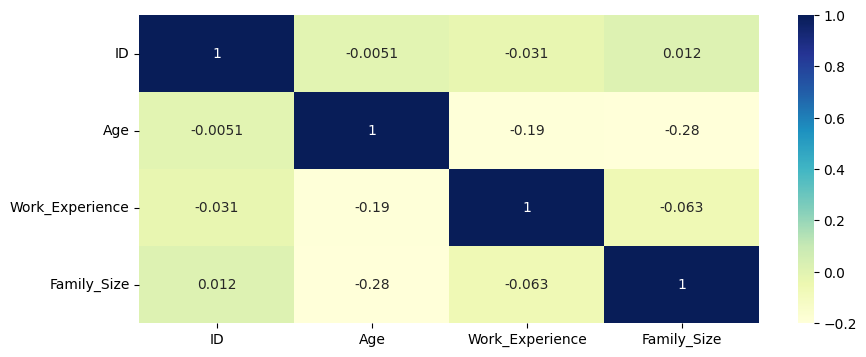

In [25]:

corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=1,cmap='YlGnBu')

# Pie chart

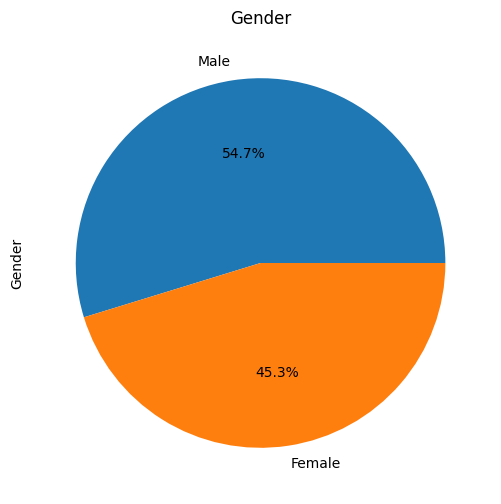

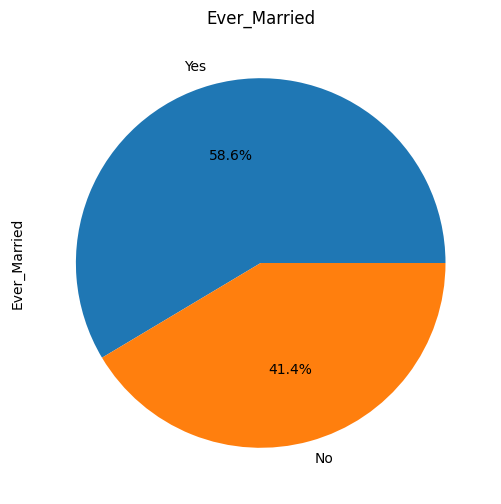

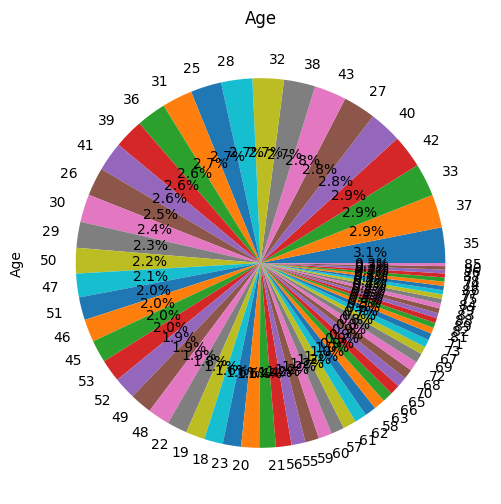

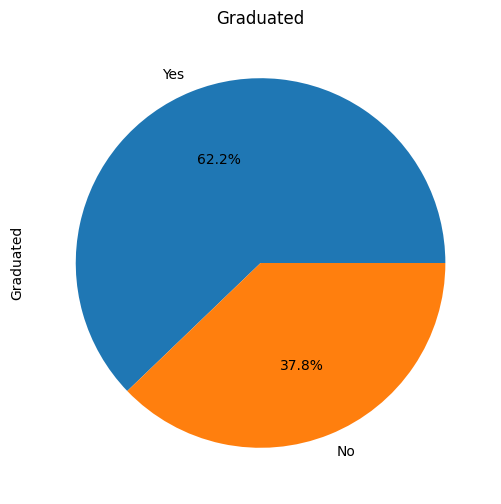

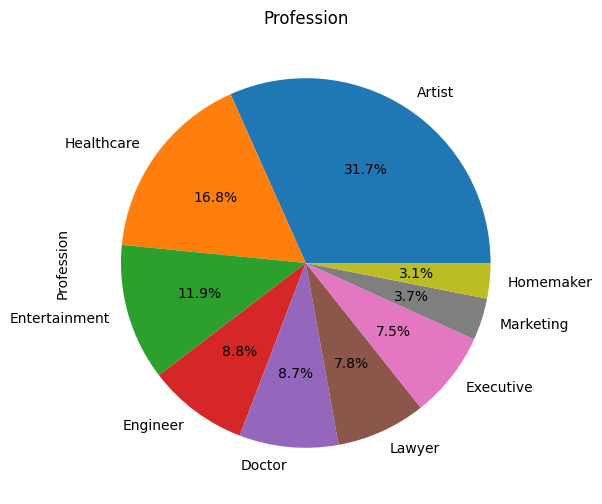

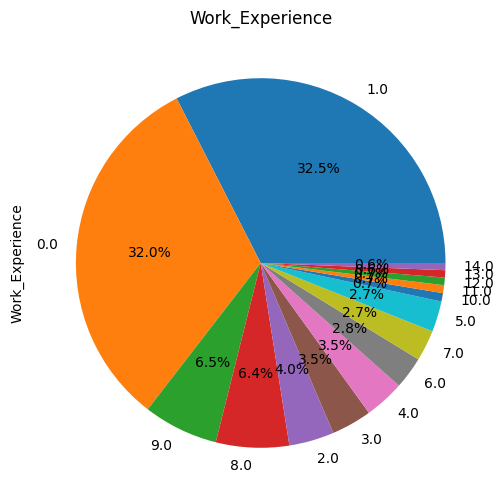

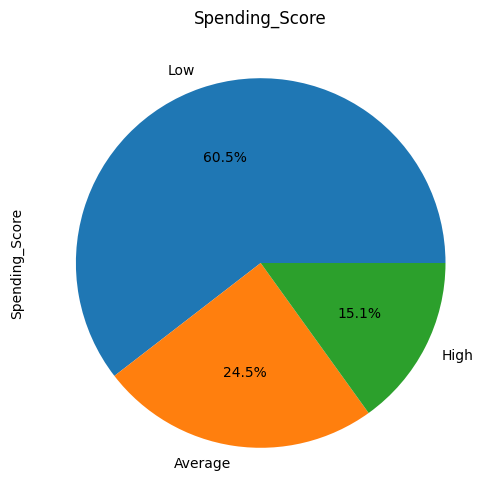

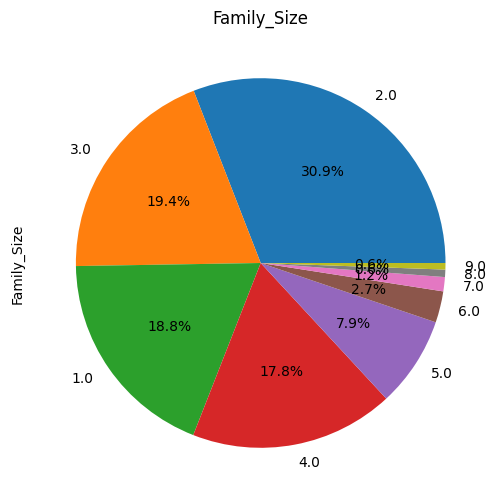

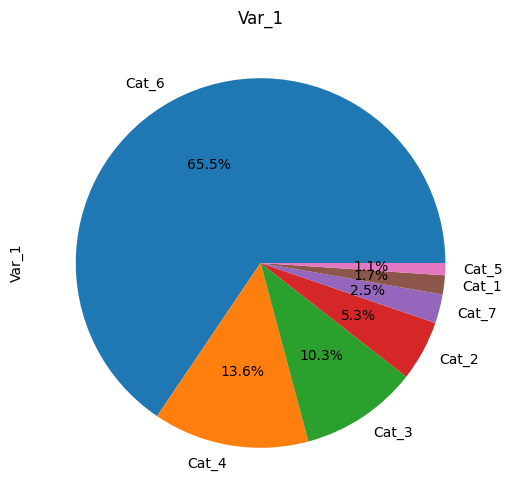

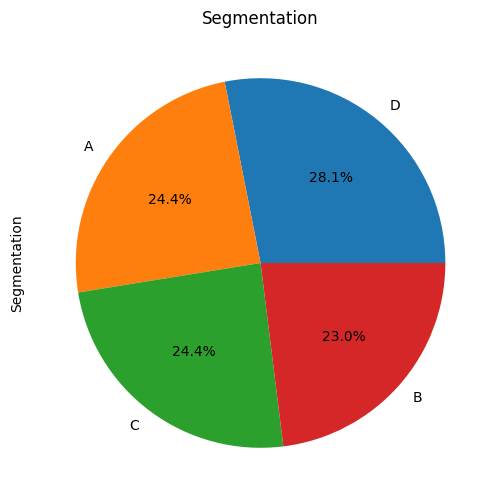

In [26]:
for i in ['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1','Segmentation']:
  data[i].value_counts().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%')
  plt.title(i)
  plt.show()

# **Preprocessing**

In [27]:
ID=data['ID']
ID

0       462809
1       462643
2       466315
3       461735
4       462669
         ...  
8063    464018
8064    464685
8065    465406
8066    467299
8067    461879
Name: ID, Length: 8068, dtype: int64

In [28]:
data.drop(['ID'],axis=1,inplace=True)
data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [29]:
for i in ['Ever_Married','Spending_Score']:
  print(data.groupby([i]).Profession.value_counts())

Ever_Married  Profession   
No            Healthcare       1153
              Artist            713
              Doctor            366
              Entertainment     358
              Engineer          267
              Marketing         189
              Homemaker         112
              Lawyer             40
              Executive          37
Yes           Artist           1774
              Entertainment     579
              Lawyer            575
              Executive         550
              Engineer          415
              Doctor            311
              Healthcare        145
              Homemaker         128
              Marketing          96
Name: Profession, dtype: int64
Spending_Score  Profession   
Average         Artist           1011
                Entertainment     319
                Engineer          221
                Doctor            177
                Executive          75
                Homemaker          60
                Healthcare         

# Missing Value

In [30]:
#missing values of Profession
data['Profession'][(data['Profession'].isnull()) & ((data['Ever_Married'] == 'Yes') | (data['Spending_Score'] == 'Average'))] = 'Artist'
data['Profession'][(data['Profession'].isnull()) & (data['Ever_Married'] == 'No')] = 'Healthcare'
data['Profession'][(data['Profession'].isnull()) & (data['Spending_Score'] == 'High')] = 'Executive'


<ipython-input-30-f35f220da30d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Profession'][(data['Profession'].isnull()) & ((data['Ever_Married'] == 'Yes') | (data['Spending_Score'] == 'Average'))] = 'Artist'
<ipython-input-30-f35f220da30d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Profession'][(data['Profession'].isnull()) & (data['Ever_Married'] == 'No')] = 'Healthcare'
<ipython-input-30-f35f220da30d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [31]:
#missing values of Var_1
data.loc[(data['Segmentation'] == 'C') & (data['Var_1'].isnull()), 'Var_1'] = 'Cat_6'
data.loc[(data['Graduated'] == 'Yes') & (data['Var_1'].isnull()), 'Var_1'] = 'Cat_6'
data.loc[(data['Spending_Score'] == 'Low') & (data['Var_1'].isnull()), 'Var_1'] = 'Cat_3'
data.loc[(data['Profession'] == 'Artist') & (data['Var_1'].isnull()), 'Var_1'] = 'Cat_6'
data.loc[(data['Gender'] == 'Female') & (data['Var_1'].isnull()), 'Var_1'] = 'Cat_5'
data.loc[(data['Ever_Married'] == 'Yes') & (data['Var_1'].isnull()), 'Var_1'] = 'Cat_6'

In [32]:
data['Ever_Married'].replace(np.nan, data['Ever_Married'].mode()[0], inplace=True)


In [33]:
data['Graduated'].replace(np.nan, data['Graduated'].mode()[0], inplace=True)

In [34]:
for i in ['Work_Experience','Family_Size']:
  data[i]=data[i].fillna(data[i].median())

In [35]:
data.isna().sum()  

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

# Encoding

In [36]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Profession'] = le.fit_transform(data['Profession'])
data['Spending_Score'] = le.fit_transform(data['Spending_Score'])
data['Var_1'] = le.fit_transform(data['Var_1'])
data['Segmentation'] = le.fit_transform(data['Segmentation'])

In [37]:
data['Gender'] = data['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
data['Ever_Married'] = [1 if x == 'Yes' else 0 for x in data['Ever_Married']]
data['Graduated'] = [1 if x == 'Yes' else 0 for x in data['Graduated']]
data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,5,1.0,2,4.0,3,3
1,1,1,38,1,2,1.0,0,3.0,3,0
2,1,1,67,1,2,1.0,2,1.0,5,1
3,0,1,67,1,7,0.0,1,2.0,5,1
4,1,1,40,1,3,1.0,1,6.0,5,0
...,...,...,...,...,...,...,...,...,...,...
8063,0,0,22,0,5,0.0,2,7.0,0,3
8064,0,0,35,0,4,3.0,2,4.0,3,3
8065,1,0,33,1,5,1.0,2,1.0,5,3
8066,1,0,27,1,5,1.0,2,4.0,5,1


# Heatmap

<Axes: >

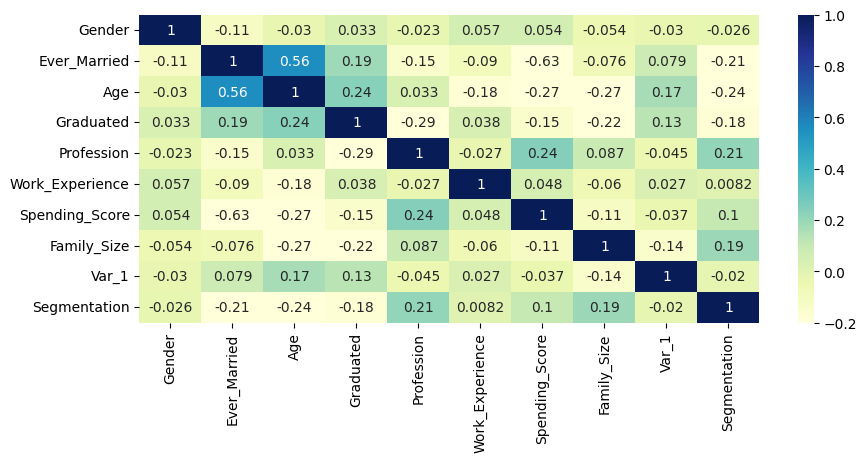

In [38]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=1,cmap='YlGnBu')

# Boxplot

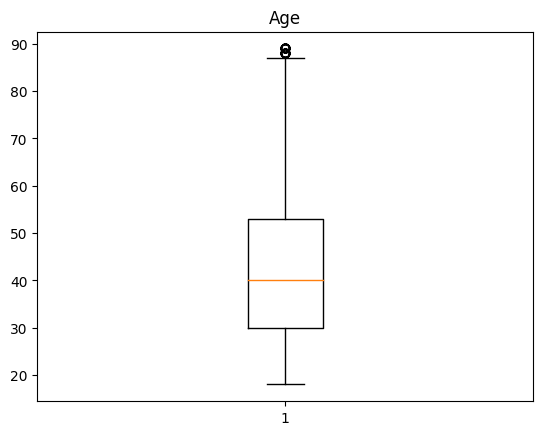

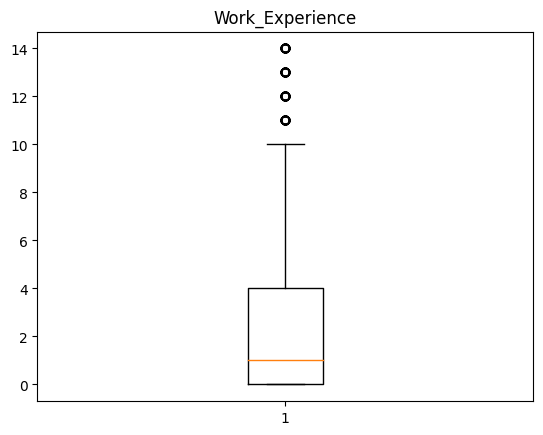

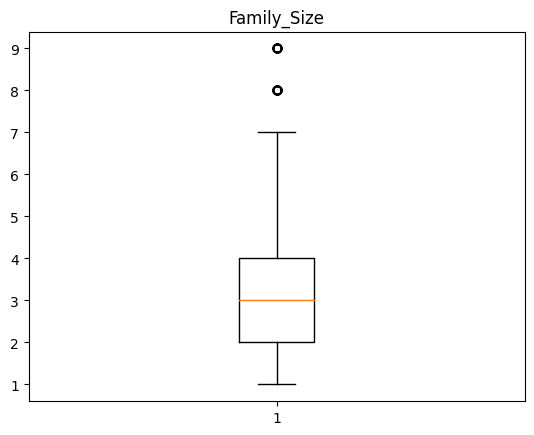

In [39]:
for i in ['Age','Work_Experience','Family_Size']:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

# Outlier Removal

In [40]:

import scipy.stats as stats
z=np.abs(stats.zscore(data))
data1=data[(z<3).all(axis=1)]

In [41]:
data1

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,5,1.0,2,4.0,3,3
1,1,1,38,1,2,1.0,0,3.0,3,0
2,1,1,67,1,2,1.0,2,1.0,5,1
3,0,1,67,1,7,0.0,1,2.0,5,1
4,1,1,40,1,3,1.0,1,6.0,5,0
...,...,...,...,...,...,...,...,...,...,...
8063,0,0,22,0,5,0.0,2,7.0,0,3
8064,0,0,35,0,4,3.0,2,4.0,3,3
8065,1,0,33,1,5,1.0,2,1.0,5,3
8066,1,0,27,1,5,1.0,2,4.0,5,1


In [42]:
data1.shape

(7885, 10)

In [43]:
y=data1['Segmentation'] 
x=data1.drop('Segmentation', axis=1) 

# Train Test Split

In [44]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

# Standard Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [46]:
data1=pd.concat([ID,data1],axis=1)
data1

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,3.0,3.0
1,462643,1.0,1.0,38.0,1.0,2.0,1.0,0.0,3.0,3.0,0.0
2,466315,1.0,1.0,67.0,1.0,2.0,1.0,2.0,1.0,5.0,1.0
3,461735,0.0,1.0,67.0,1.0,7.0,0.0,1.0,2.0,5.0,1.0
4,462669,1.0,1.0,40.0,1.0,3.0,1.0,1.0,6.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,0.0,0.0,22.0,0.0,5.0,0.0,2.0,7.0,0.0,3.0
8064,464685,0.0,0.0,35.0,0.0,4.0,3.0,2.0,4.0,3.0,3.0
8065,465406,1.0,0.0,33.0,1.0,5.0,1.0,2.0,1.0,5.0,3.0
8066,467299,1.0,0.0,27.0,1.0,5.0,1.0,2.0,4.0,5.0,1.0


# Logistic Regression

In [47]:

from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [48]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is ',accuracy_score(y_test,y_pred))
print('Precision is ',precision_score(y_test,y_pred,average='macro'))
print('Recall is ',recall_score(y_test,y_pred,average='macro'))
print('f1 is ',f1_score(y_test,y_pred,average='macro'))
classification_report(y_test,y_pred) 

Accuracy is  0.4898580121703854
Precision is  0.45283491554101996
Recall is  0.4755251891481062
f1 is  0.4533182535587429


'              precision    recall  f1-score   support\n\n           0       0.37      0.42      0.39       447\n           1       0.31      0.14      0.19       467\n           2       0.51      0.59      0.55       512\n           3       0.61      0.75      0.68       546\n\n    accuracy                           0.49      1972\n   macro avg       0.45      0.48      0.45      1972\nweighted avg       0.46      0.49      0.47      1972\n'

# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

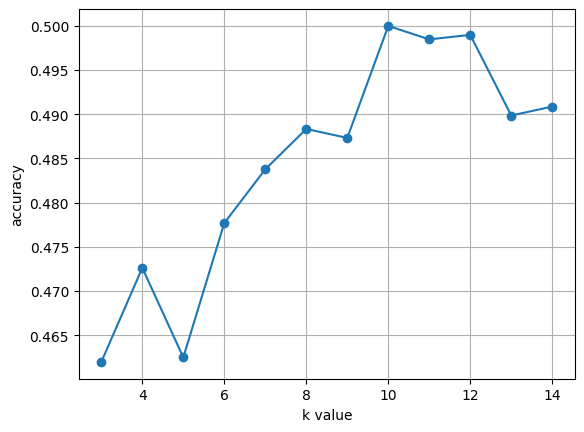

In [50]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [51]:
classifier = KNeighborsClassifier(n_neighbors=10,metric='manhattan')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [52]:
print('Accuracy is', accuracy_score(y_test,y_pred))
print('Precision is', precision_score(y_test,y_pred,average='macro'))
print('Recall is', recall_score(y_test,y_pred,average='macro'))
print('f1 score is', f1_score(y_test,y_pred,average='macro'))
classification_report(y_test,y_pred) 

Accuracy is 0.5
Precision is 0.48947592576436105
Recall is 0.4919028197625537
f1 score is 0.4884023641642504


'              precision    recall  f1-score   support\n\n           0       0.39      0.47      0.43       447\n           1       0.38      0.30      0.33       467\n           2       0.55      0.54      0.55       512\n           3       0.64      0.66      0.65       546\n\n    accuracy                           0.50      1972\n   macro avg       0.49      0.49      0.49      1972\nweighted avg       0.50      0.50      0.50      1972\n'

# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)

In [54]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy is:  0.4208924949290061
              precision    recall  f1-score   support

           0       0.31      0.33      0.32       447
           1       0.30      0.30      0.30       467
           2       0.45      0.42      0.44       512
           3       0.60      0.59      0.60       546

    accuracy                           0.42      1972
   macro avg       0.41      0.41      0.41      1972
weighted avg       0.42      0.42      0.42      1972



# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
y_pred= rf_clf.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy is:  0.4832657200811359
              precision    recall  f1-score   support

           0       0.38      0.41      0.39       447
           1       0.38      0.34      0.36       467
           2       0.52      0.50      0.51       512
           3       0.62      0.66      0.64       546

    accuracy                           0.48      1972
   macro avg       0.47      0.47      0.47      1972
weighted avg       0.48      0.48      0.48      1972



# SVM using rbf

In [57]:
from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)
y_pred= svmclf.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is: ', accuracy_score(y_test,y_pred))

Accuracy is:  0.5182555780933062


# Hyperparametric tuning

In [59]:
rf_clf = RandomForestClassifier(n_estimators=30,max_depth=7,criterion='entropy',min_samples_split=2)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=30)

In [60]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
y_pred= rf_clf.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy is:  0.5121703853955375
              precision    recall  f1-score   support

           0       0.38      0.41      0.40       447
           1       0.39      0.28      0.32       467
           2       0.56      0.59      0.57       512
           3       0.63      0.73      0.68       546

    accuracy                           0.51      1972
   macro avg       0.49      0.50      0.49      1972
weighted avg       0.50      0.51      0.50      1972



# Stratified K fold in logistic regression

In [61]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10,random_state=42,shuffle=True)

In [62]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [63]:
from sklearn.model_selection import cross_val_score
logistic_skcv_score=cross_val_score(logit_model,x,y,cv=skfold_validator)
logistic_skcv_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.48795944, 0.50063371, 0.47528517, 0.49429658, 0.46134347,
       0.4784264 , 0.51015228, 0.48096447, 0.47715736, 0.48350254])

In [64]:
np.mean(logistic_skcv_score)

0.4849721423378561

#Stratified K fold in KNN

In [65]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10,random_state=42,shuffle=True)

In [66]:

from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

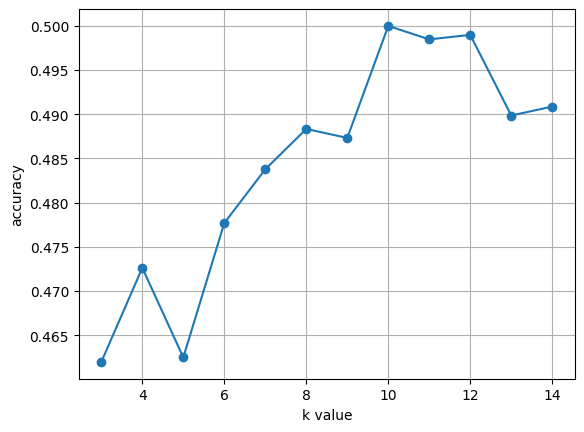

In [67]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [68]:
classifier = KNeighborsClassifier(n_neighbors=10,metric='manhattan')
classifier.fit(x_train,y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [69]:
from sklearn.model_selection import cross_val_score
knn_skcv_score=cross_val_score(classifier,x,y,cv=skfold_validator)
knn_skcv_score

array([0.47528517, 0.47275032, 0.50697085, 0.51204056, 0.45120406,
       0.50507614, 0.49365482, 0.48096447, 0.47461929, 0.50126904])

In [70]:
np.mean(knn_skcv_score)

0.487383470691552

#Stratified K fold in Decision tree

In [71]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10,random_state=42,shuffle=True)

In [72]:

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)


DecisionTreeClassifier()

In [73]:
from sklearn.model_selection import cross_val_score
decision_skcv_score=cross_val_score(dt_clf,x,y,cv=skfold_validator)
decision_skcv_score

array([0.43092522, 0.41064639, 0.43599493, 0.49556401, 0.40050697,
       0.42893401, 0.41878173, 0.42385787, 0.40482234, 0.43654822])

In [74]:
np.mean(decision_skcv_score)

0.42865816782793875

# Stratified K fold in Random forest 

In [75]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10,random_state=42,shuffle=True)

In [76]:

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
from sklearn.model_selection import cross_val_score
rf_skcv_score=cross_val_score(rf_clf,x,y,cv=skfold_validator)
rf_skcv_score

array([0.46387833, 0.45373891, 0.48288973, 0.5373891 , 0.47148289,
       0.50380711, 0.49619289, 0.46700508, 0.47461929, 0.5       ])

In [78]:
np.mean(rf_skcv_score)

0.48510033261919927

#Stratified K fold in SVM 

In [79]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10,random_state=42,shuffle=True)

In [80]:
from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)


SVC()

In [81]:
from sklearn.model_selection import cross_val_score
svm_skcv_score=cross_val_score(svmclf,x,y,cv=skfold_validator)
svm_skcv_score

array([0.48288973, 0.48922687, 0.47275032, 0.48415716, 0.46134347,
       0.49619289, 0.4822335 , 0.46319797, 0.46827411, 0.49238579])

In [82]:
np.mean(svm_skcv_score)

0.4792651817825043

#Stratified K fold in hyper parameter tuning

In [83]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [84]:
hyper_rf_clf = RandomForestClassifier(n_estimators=30,max_depth=7,criterion='entropy',min_samples_split=2,random_state=42)
hyper_rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=30,
                       random_state=42)

In [85]:
from sklearn.model_selection import cross_val_score
hyper_skcv_score=cross_val_score(hyper_rf_clf,x,y,cv=skfold_validator)
hyper_skcv_score

array([0.52091255, 0.54499366, 0.5234474 , 0.54245881, 0.50570342,
       0.53045685, 0.53426396, 0.54949239, 0.52284264, 0.54695431])

In [86]:
np.mean(hyper_skcv_score)

0.5321525995123301